In [150]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import KFold
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
 

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 20

df = pd.read_csv('train.csv')
# test = pd.read_csv('test.csv')

quantitative = [f for f in df.columns if df.dtypes[f] != 'object']
quantitative.remove('SalePrice')
quantitative.remove('Id')
qualitative = [f for f in df.columns if df.dtypes[f] == 'object']

In [4]:
NAs = pd.concat([df.isnull().sum(), test.isnull().sum()], axis =1, keys=['df', 'Test'])
NAs[NAs.sum(axis=1) >0]                

,df,Test
Alley,1369,1352.0
BsmtCond,37,45.0
BsmtExposure,38,44.0
BsmtFinSF1,0,1.0
BsmtFinSF2,0,1.0
BsmtFinType1,37,42.0
BsmtFinType2,38,42.0
BsmtFullBath,0,2.0
BsmtHalfBath,0,2.0
BsmtQual,37,44.0


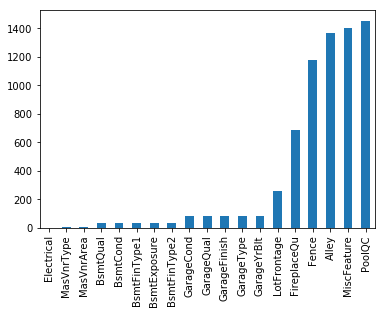

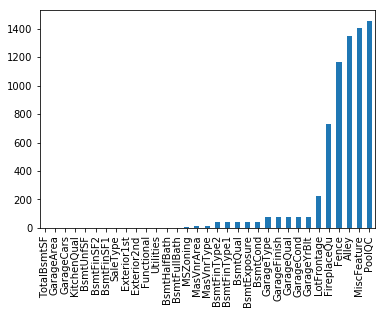

In [183]:
def null_bar_plot(data):
    missing = data.isnull().sum()
    missing = missing[missing > 0]
    missing.sort_values(inplace=True)
    missing.plot.bar()
    
null_bar_plot(df)
plt.figure()
null_bar_plot(test)

In [159]:
test['KitchenAbvGr'][test['KitchenQual'].isnull() == True].describe()


count    1.0
mean     1.0
std      NaN
min      1.0
25%      1.0
50%      1.0
75%      1.0
max      1.0
Name: KitchenAbvGr, dtype: float64

In [172]:
test['Utilities'].unique()

array(['AllPub', nan], dtype=object)

In [359]:
def get_scores(prediction,labels):
    print('R2 score: {}'.format(R2_score(predictions, labels)))
    print('RMSE: {}'.format(npsqrt(mean_squared_error(predictions, labels))))

#Show scores for train and validation set
def train_test(estimator, x_trn,x_test, y_trn, y_test):
    prediction_train = estmator.predict(x_trn)
    print(estimator)                                #Printing estimator 
    get_scores(prediction_train, y_trn)             #Printing train scores
    prediction_test = estimator.predict(x_test)
    print('Test')                                   #Printing Test scores
    get_scores(predictions_test,y_test)

# Dealing with null values

meikegw 'Filling Up Missing Values'


In [151]:

# Look at Categorical values
def cat_exploration(column):
    return df[column].value_counts()


# Impute Categorical variables
def cat_imputer(column, value):
    df.loc[df[column].isnull(), column] = value

df['LotFrontage'].corr(df['LotArea'])# check correlation of Lot area and Lot frontage
sqrtarea = np.sqrt(df['LotArea'])
df['SqrtLotArea'] = sqrtarea
df['LotFrontage'].corr(df['SqrtLotArea'])


import seaborn as sns
# sns.pairplot(df[['LotFrontage','SqrtLotArea']].dropna())
cond = df['LotFrontage'].isnull()  # define all instances of condos
df.LotFrontage[cond] = df.SqrtLotArea[cond] # make nulls equal to square root of lot area
del df['SqrtLotArea']

# Alley
cat_exploration('Alley')
cat_imputer('Alley', 'None')

# Masonry Veneer Type
df[['MasVnrType', 'MasVnrArea']][df['MasVnrType'].isnull()==True]
cat_exploration('MasVnrType')
cat_imputer('MasVnrType', 'None')
cat_imputer('MasVnrArea', 0.0)

# Basement
basement_col = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFinSF1', 'BsmtFinSF2']
df[basement_col][df['BsmtQual'].isnull() == True]
for col in basement_col:
    if 'FinSF' not in col:
        cat_imputer(col, 'None')#categorical cariables are null where numerical are 0. Therefore there is no basement and NaN is None
    else:
        cat_imputer(col, 0.0)

# Electrical
cat_exploration('Electrical')
cat_imputer('Electrical', 'SBrkr')        #Impute most frequent value


# Fireplace

df['Fireplaces'][df['FireplaceQu'].isnull() == True].describe()
cat_exploration('FireplaceQu')
cat_imputer('FireplaceQu', 'None')
# pd.crosstab(df.Fireplaces, df.FireplaceQu)

# Garage
garage_col = ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'GarageCars', 'GarageArea']
df[garage_col][df['GarageType'].isnull() == True]

#Some residences have no garage
for col in garage_col:
    if df[col].dtype == np.object:
        cat_imputer(col, 'None')
    else:
        cat_imputer(col,0)

# Pool
df['PoolArea'][df['PoolQC'].isnull() == True].describe()
cat_imputer('PoolQC', 'None')

# Fence
cat_imputer('Fence', 'None')

# Miscellaneous Features
cat_imputer('MiscFeature','None')



C:\Users\bobbyd\Anaconda2\envs\neural_net\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [410]:
test[test['TotalBsmtSF']=='None']

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
660,2121,20,RM,99.0,5940,Pave,None,IR1,Lvl,AllPub,...,0,0,None,MnPrv,None,0,4,2008,ConLD,Abnorml


# Target Variable Correlation 

Domink Gawlik 'House Prices EDA'

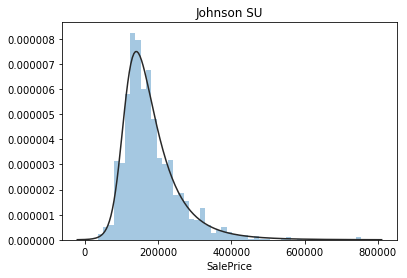

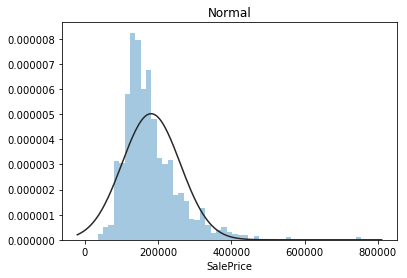

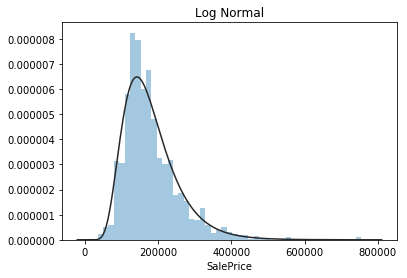

In [7]:
import scipy.stats as st
y = df['SalePrice']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

Target Variable must be log transformed before regression

# Numerical Features

In [8]:
test_normality = lambda x: stats.shapiro(x.fillna(0))[1] <.01
normal = pd.DataFrame(df[quantitative])
normal = normal.apply(test_normality)
print(not normal.any())

False


Numeric features are not a normal distribution either

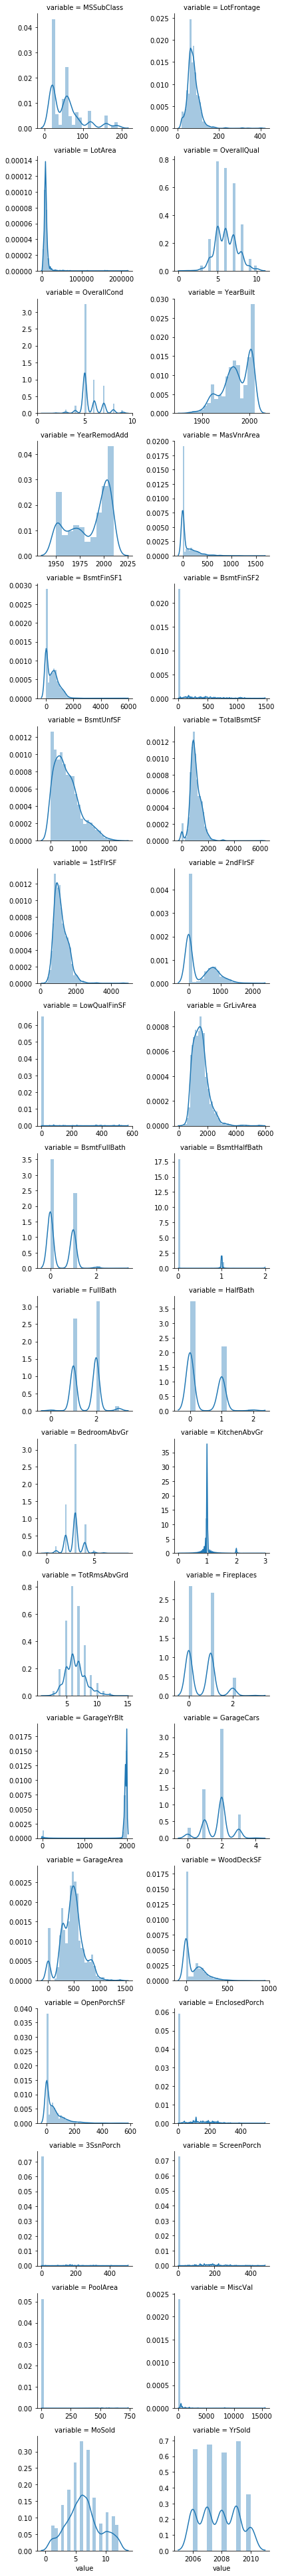

In [9]:
#Check numeric features distirbution individually
f = pd.melt(df, value_vars=quantitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

In [10]:
#Find most important features relative to target
print('Find most important Numeric features relative to target')
corr = df.corr()
corr.sort_values(['SalePrice'], ascending =False, inplace =True)
print(corr.SalePrice)

Find most important Numeric features relative to target
SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
LotFrontage      0.286676
HalfBath         0.284108
LotArea          0.263843
GarageYrBlt      0.261366
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
Enclosed

# Categorical Variables

Categorical variables get investigated in two ways. First each distribution with respect to salesprice is analyzed. Next make dummy variables out of relevant features

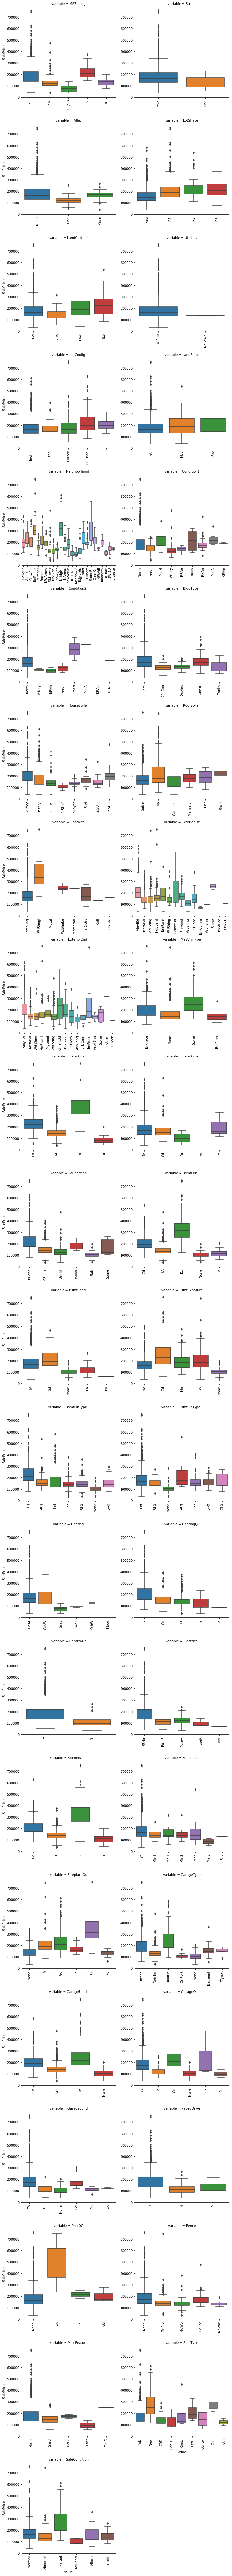

In [11]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(df, id_vars=['SalePrice'], value_vars=qualitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")

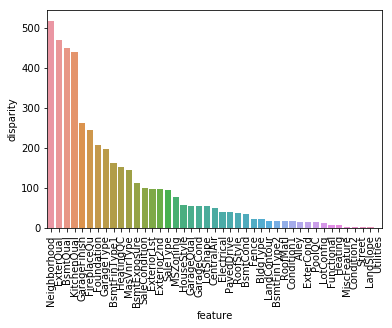

In [12]:
# Disparity between values of features
def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = qualitative
    pvals = []
    for c in qualitative:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

a = anova(df)
a['disparity'] = np.log(1./a['pval'].values)
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)

In [252]:
def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    ordering['spmean'] = frame[[feature, 'SalePrice']].groupby(feature).mean()['SalePrice']
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict()
    
    for cat, o in ordering.items():
        frame.loc[frame[feature] == cat, feature+'_E'] = o
    
qual_encoded = []
for q in qualitative:  
    encode(df, q)
    qual_encoded.append(q+'_E')
print(qual_encoded)

['MSZoning_E', 'Street_E', 'Alley_E', 'LotShape_E', 'LandContour_E', 'Utilities_E', 'LotConfig_E', 'LandSlope_E', 'Neighborhood_E', 'Condition1_E', 'Condition2_E', 'BldgType_E', 'HouseStyle_E', 'RoofStyle_E', 'RoofMatl_E', 'Exterior1st_E', 'Exterior2nd_E', 'MasVnrType_E', 'ExterQual_E', 'ExterCond_E', 'Foundation_E', 'BsmtQual_E', 'BsmtCond_E', 'BsmtExposure_E', 'BsmtFinType1_E', 'BsmtFinType2_E', 'Heating_E', 'HeatingQC_E', 'CentralAir_E', 'Electrical_E', 'KitchenQual_E', 'Functional_E', 'FireplaceQu_E', 'GarageType_E', 'GarageFinish_E', 'GarageQual_E', 'GarageCond_E', 'PavedDrive_E', 'PoolQC_E', 'Fence_E', 'MiscFeature_E', 'SaleType_E', 'SaleCondition_E']


# Analyzing multicollinearity


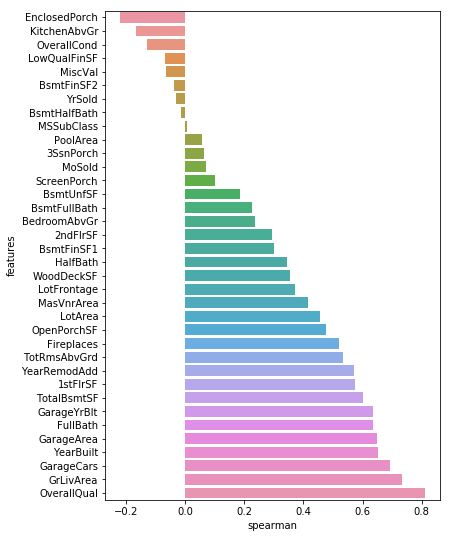

In [42]:
def spearman(frame, features):
    spr = pd.DataFrame()
    spr['features'] = features
    spr['spearman'] = [frame[f].corr(frame['SalePrice'], 'spearman') for f in features]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6, .25 * len(features)))
    sns.barplot(data = spr, y='features', x='spearman', orient='h')

features = quantitative + qual_encoded
spearman(df, features)

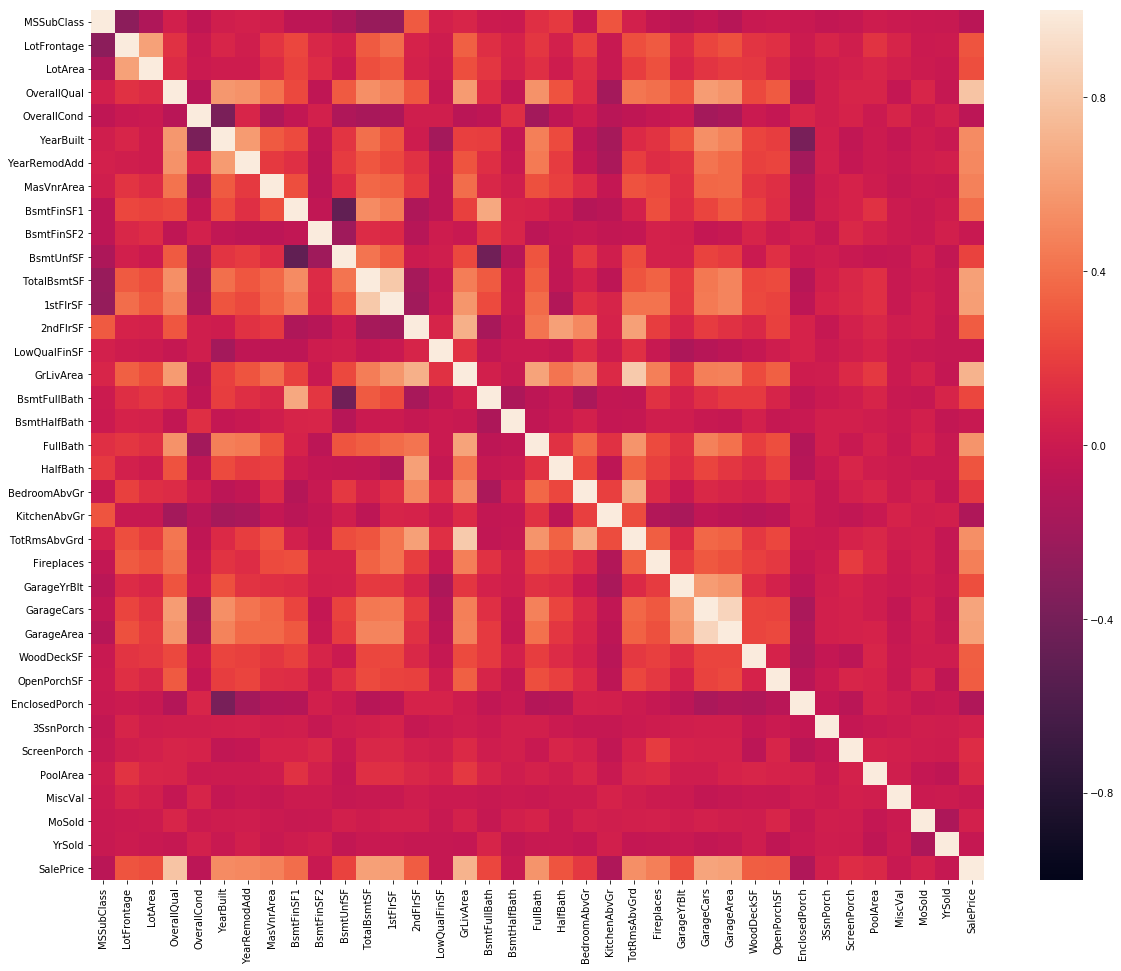

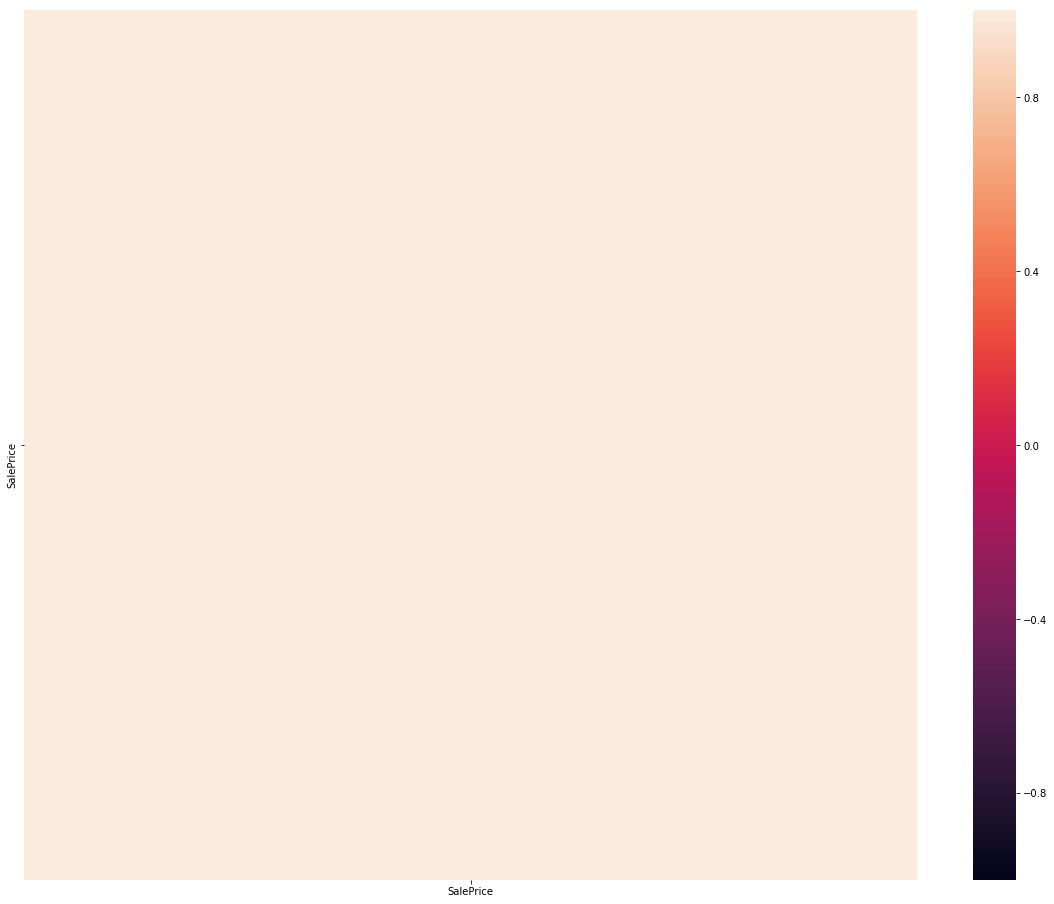

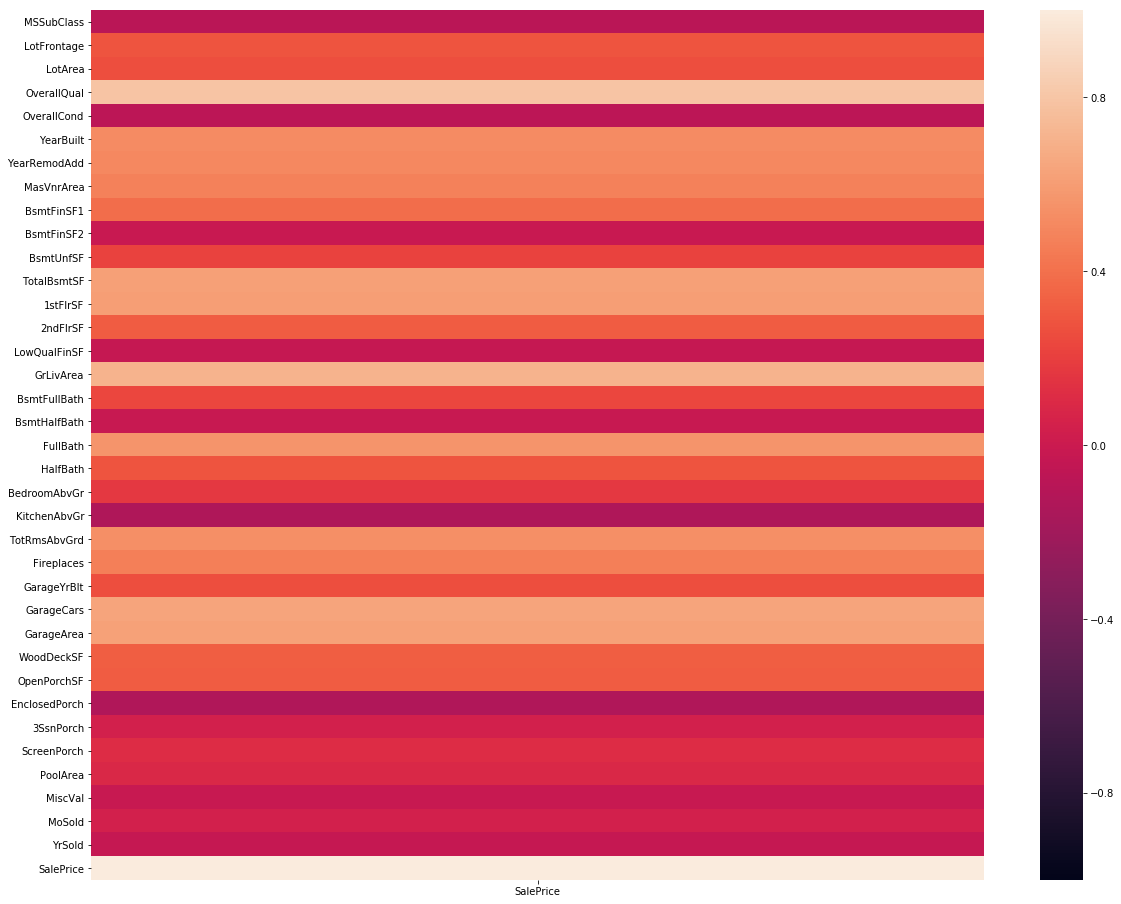

In [43]:
plt.figure(1, figsize=(20,16))
corr = df[quantitative + ['SalePrice']].corr()
sns.heatmap(corr,vmin =-1, vmax=1)
plt.figure(2, figsize=(20,16))
corr = df[qual_encoded+['SalePrice']].corr()
sns.heatmap(corr,vmin =-1, vmax=1)
plt.figure(3, figsize=(20,16))
corr = pd.DataFrame(np.zeros([len(quantitative)+1, len(qual_encoded)+1]), index=quantitative+['SalePrice'], columns=qual_encoded+['SalePrice'])
for q1 in quantitative+['SalePrice']:
    for q2 in qual_encoded+['SalePrice']:
        corr.loc[q1, q2] = df[q1].corr(df[q2])
sns.heatmap(corr,vmin =-1, vmax=1)
    

# Pairplots

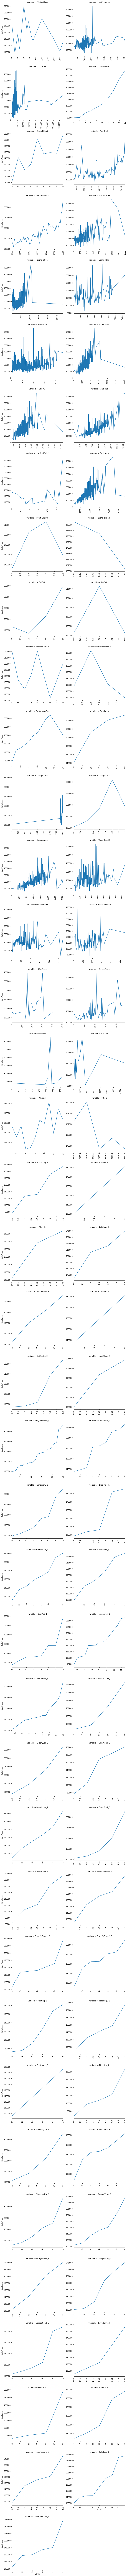

In [315]:
def pairplot(x,y, **kwargs):
    ax = plt.gca()
    ts = pd.DataFrame({'time':x, 'val':y})
    ts = ts.groupby('time').mean()
    ts.plot(ax=ax)
    plt.xticks(rotation=90)
    
f = pd.melt(df, id_vars=['SalePrice'], value_vars=quantitative + qual_encoded)
g = sns.FacetGrid(f, col='variable', col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(pairplot, 'value', 'SalePrice')

In [228]:
disparity = pd.DataFrame(a['disparity'])


# Price Segments

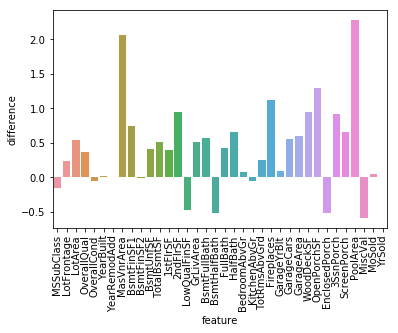

In [44]:
# investigate relationship between features wiht shift in SalesPrice

features = quantitative

standard = df[df['SalePrice'] < 200000]
pricey = df[df['SalePrice'] > 200000]

diff = pd.DataFrame()
diff['feature'] = features
diff['difference'] = [(pricey[f].fillna(0.).mean() - standard[f].fillna(0.).mean())/(standard[f].fillna(0).mean())
                      for f in features]
sns.barplot(data=diff, x='feature', y='difference')
x=plt.xticks(rotation=90)

# Clustering

0.753987472306


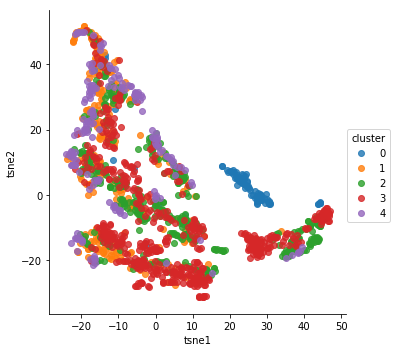

In [153]:
#Visualize relationship between variables in high dimesionality with t-stochastic neighbors emmbedding
features = quantitative + qual_encoded
model = TSNE(n_components=2, random_state=0, perplexity=50)
X = df[features].fillna(0.).values
tsne = model.fit_transform(X)

std = StandardScaler()
s = std.fit_transform(X)
pca = PCA(n_components=30)
pca.fit(s)
pc = pca.transform(s)
kmeans = KMeans(n_clusters=5)
kmeans.fit(pc)

fr = pd.DataFrame({'tsne1': tsne[:,0], 'tsne2': tsne[:, 1], 'cluster': kmeans.labels_})
sns.lmplot(data=fr, x='tsne1', y='tsne2', hue='cluster', fit_reg=False)
print(np.sum(pca.explained_variance_ratio_))


In [ ]:
y= df['SalesPrice']

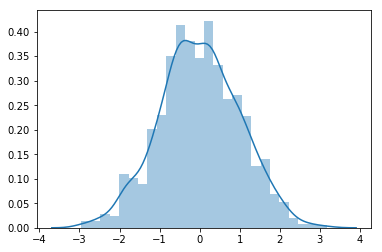

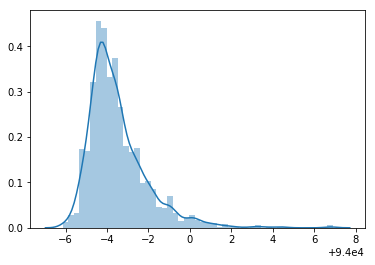

In [378]:
# Investigate Johnsonsu Transformation
y = df['SalePrice'].values

def johnson(y):
    gamma, eta, epsilon, lbda = st.johnsonsu.fit(y)
    yt = gamma + eta * np.arcsinh((y-epsilon)/lbda)
    return yt, gamma, eta , epsilon, lbda

def johnson_inverse(y, gamma, eta, epsilon, lbda):
    return lbda*np.sinh((y - gamma)/eta)+epsilon

yt, g, et, ep, l = johnson(y)
yt2 = johnson_inverse(yt, g, et, ep,1)
plt.figure(1)
sns.distplot(yt)
plt.figure(2)
sns.distplot(yt2)

# Regression

In [154]:
def error(actual, predicted):
    actual = np.log(actual)
    predicted = np.log(predicted)
    return np.sqrt(np.sum(np.square(actual-predicted))/len(actual))

def log_transform(feature):
    df[feature] = np.log1p(df[feature].values)

def quadratic(feature):
    df[feature+'2'] = df[feature]**2
    
log_transform('GrLivArea')
log_transform('1stFlrSF')
log_transform('2ndFlrSF')
log_transform('TotalBsmtSF')
log_transform('LotArea')
log_transform('LotFrontage')
log_transform('KitchenAbvGr')
log_transform('GarageArea')

quadratic('OverallQual')
quadratic('YearBuilt')
quadratic('YearRemodAdd')
quadratic('TotalBsmtSF')
quadratic('2ndFlrSF')
quadratic('Neighborhood_E')
quadratic('RoofMatl_E')
quadratic('GrLivArea')

qdr = ['OverallQual2', 'YearBuilt2', 'YearRemodAdd2', 'TotalBsmtSF2',
        '2ndFlrSF2', 'Neighborhood_E2', 'RoofMatl_E2', 'GrLivArea2']


df['HasBasement'] = df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
df['HasGarage'] = df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
df['Has2ndFloor'] = df['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
df['HasMasVnr'] = df['MasVnrArea'].apply(lambda x: 1 if x > 0 else 0)
df['HasWoodDeck'] = df['WoodDeckSF'].apply(lambda x: 1 if x > 0 else 0)
df['HasPorch'] = df['OpenPorchSF'].apply(lambda x: 1 if x > 0 else 0)
df['HasPool'] = df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
df['IsNew'] = df['YearBuilt'].apply(lambda x: 1 if x > 2000 else 0)

boolean = ['HasBasement', 'HasGarage', 'Has2ndFloor', 'HasMasVnr', 'HasWoodDeck',
            'HasPorch', 'HasPool', 'IsNew']



In [172]:
df[features].columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'MSZoning_E', 'Street_E', 'Alley_E', 'LotShape_E',
       'LandContour_E', 'Utilities_E', 'LotConfig_E', 'LandSlope_E',
       'Neighborhood_E', 'Condition1_E', 'Condition2_E', 'BldgType_E',
       'HouseStyle_E', 'RoofStyle_E', 'RoofMatl_E', 'Exterior1st_E',
       'Exterior2nd_E', 'MasVnrType_E', 'ExterQual_E', 'ExterCond_E',
       'Foundation_E', 'BsmtQual_E', 'BsmtCond_E', 'BsmtExposure_E',
       'BsmtFinType1_E', 'BsmtFinType2_E', 'H

In [155]:
features = quantitative + qual_encoded +boolean + qdr

lasso = linear_model.LassoLarsCV(max_iter=1000)
X = df[features].fillna(0.).values
y = df['SalePrice']
lasso.fit(X, np.log(y))

LassoLarsCV(copy_X=True, cv=None, eps=2.2204460492503131e-16,
      fit_intercept=True, max_iter=1000, max_n_alphas=1000, n_jobs=1,
      normalize=True, positive=False, precompute='auto', verbose=False)

In [156]:
yhat = np.exp(lasso.predict(X))
error(y,yhat)

0.11305713076847966